[*********************100%***********************]  9 of 9 completed


                 Close
Date                  
2019-01-02  224.570007
2019-01-03  215.699997
2019-01-04  226.190002
2019-01-07  229.259995
2019-01-08  232.679993


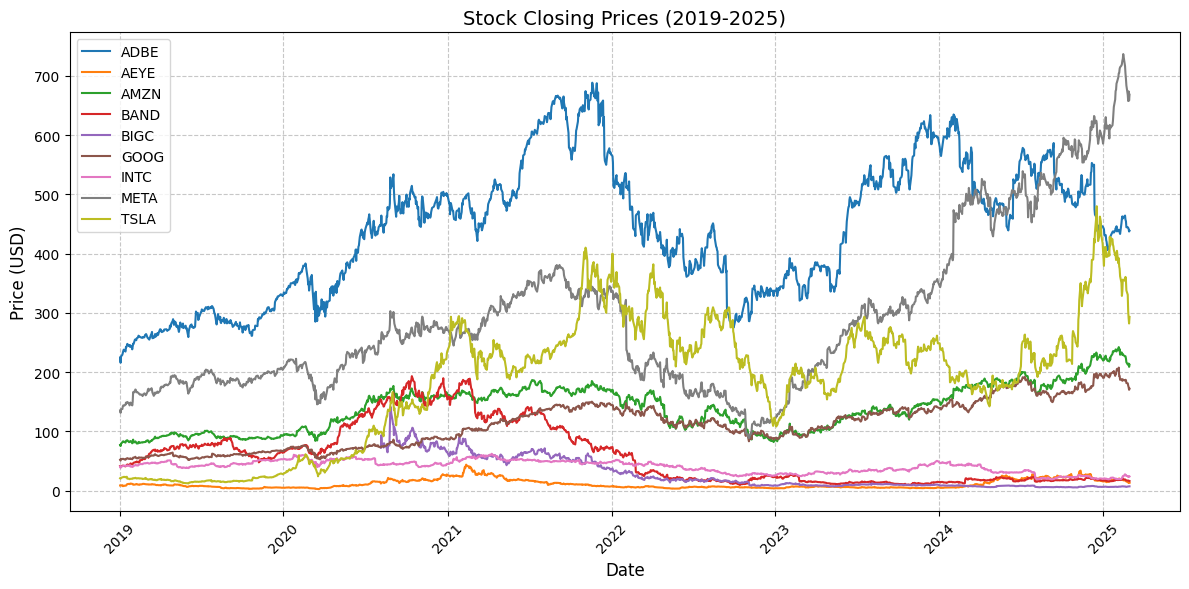

Ticker,ADBE,AEYE,AMZN,BAND,BIGC,GOOG,INTC,META,TSLA
Date,,,,,,,,,
2019-01-02,224.570007,8.50,76.956497,41.320000,NaN,52.045986,40.518044,135.163681,20.674667
2019-01-03,215.699997,8.56,75.014000,39.570000,NaN,50.563507,38.289040,131.238678,20.024000
2019-01-04,226.190002,8.54,78.769501,41.270000,NaN,53.283127,40.638535,137.425034,21.179333
2019-01-07,229.259995,8.90,81.475502,41.689999,NaN,53.167671,40.827869,137.524673,22.330667
2019-01-08,232.679993,7.32,82.829002,42.160000,NaN,53.560310,41.086056,141.987610,22.356667


In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of stocks
stocks = ['ADBE','AEYE','AMZN','BAND','BIGC','GOOG','INTC','META','TSLA']
start_date = '2019-01-01'
end_date = '2025-03-01'

# Fetch all data at once
data = yf.download(stocks, start=start_date, end=end_date, interval='1d')

# Create a dictionary of DataFrames for individual stocks/index
close_dfs = {stock: pd.DataFrame(data['Close'][stock]).rename(columns={stock: 'Close'}) 
            for stock in stocks}

# Display one to verify
print(close_dfs['ADBE'].head())

# Plot : All stocks
stock_list = [stock for stock in stocks if stock != '^IXIC']  # Exclude Nasdaq
plt.figure(figsize=(12, 6))
for stock in stock_list:
    plt.plot(close_dfs[stock].index, close_dfs[stock]['Close'], label=stock)
plt.title('Stock Closing Prices (2019-2025)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Combine all closing prices into one DataFrame
all_close = data['Close'].rename(columns={'^IXIC': 'NASDAQ'})  # Rename ^IXIC to NASDAQ for clarity
all_close.head()

In [17]:
senti = pd.read_csv('financial_sentiment_result_final.csv')
senti['stock'] = senti['stock'].apply(lambda x: 'GOOG' if 'GOOG' in x or 'GOOGL' in x else x)
senti = senti.sort_values(by=['date', 'positive_ratio'], ascending=[True, True])
senti['date'] = pd.to_datetime(senti['date'], format='%Y_%m_%d').dt.date
senti['year'] = pd.to_datetime(senti['date'], format='%Y_%m_%d').dt.year
senti['positive_diff'] = senti.groupby('stock')['positive'].diff()
senti['negative_diff'] = senti.groupby('stock')['negative'].diff()
senti['neutral_diff'] = senti.groupby('stock')['neutral'].diff()
senti['positive_ratio_diff'] = senti.groupby('stock')['positive_ratio'].diff()
senti['negative_ratio_diff'] = senti.groupby('stock')['negative_ratio'].diff()
senti['neutral_ratio_diff'] = senti.groupby('stock')['neutral_ratio'].diff()
senti = senti.sort_values(['stock', 'year'])
senti = senti.dropna()
senti[['stock','date','positive_diff','negative_diff','neutral_diff','positive_ratio_diff','neutral_ratio_diff','negative_ratio_diff']]

,stock,date,positive_diff,negative_diff,neutral_diff,positive_ratio_diff,neutral_ratio_diff,negative_ratio_diff
1,ADBE,2019-11-29,-0.5988,-0.6569,2.2557,-0.48,1.39,-0.90
2,ADBE,2020-11-27,3.8341,-8.5157,2.6817,2.69,1.91,-4.60
3,ADBE,2021-12-03,-1.2704,-19.0869,-3.6428,2.13,-0.17,-1.96
4,ADBE,2022-12-02,-1.3120,2.1360,-0.8239,-1.02,-0.64,1.66
5,ADBE,2023-12-01,-1.5253,1.2589,1.2663,-1.31,0.87,0.44
6,ADBE,2024-11-29,-0.6802,1.0267,1.6536,-0.77,1.04,-0.27
8,AEYE,2019-12-31,0.4909,-1.0055,-0.4854,0.77,-0.48,-0.30
9,AEYE,2020-12-31,-2.8668,-13.0113,-2.1219,0.71,-1.29,0.58
10,AEYE,2021-12-31,1.6147,-1.5004,-3.1144,3.33,-4.47,1.14
11,AEYE,2022-12-31,-2.3575,-0.4412,0.7987,-2.97,1.28,1.69


In [18]:
def calculate_returns(df, stock_ticker, start_date='2019-01-01', hold_period_days=2192):
    start_date = pd.to_datetime(start_date)
    end_date = start_date + pd.Timedelta(days=hold_period_days)

    # Ensure the dataframe index is a DatetimeIndex
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)
    
    # If end_date is not in df, increment the end_date until we find a trading day
    if start_date not in df.index:
        print(f"start date {start_date} is not a trading day. Searching for the next available trading day.")
        # Keep incrementing the end_date by one day until we find a trading day in the df_period
        while start_date not in df.index:
            # Keep incrementing the end_date by one day until we find a trading day in the df_period
            start_date += pd.Timedelta(days=1)  # Increment the end_date by one day

        print(f"Found next trading day: {start_date}")  # Increment the end_date by one day
        
    if end_date not in df.index:
        print(f"End date {end_date} is not a trading day. Searching for the next available trading day.")
        
        # Keep incrementing the end_date by one day until we find a trading day in the df_period
        while end_date not in df.index:
            end_date += pd.Timedelta(days=1)  # Increment the end_date by one day
        
        print(f"Found next trading day: {end_date}")
    
    # Get the price on the adjusted end_date (whether it's the original or the next available one)
    start_price = df.loc[start_date, stock_ticker]
    end_price = df.loc[end_date, stock_ticker]  # Price on the adjusted end date
    
    # Buy and hold return
    buy_hold_return = ((end_price / start_price) - 1)
    
    # Return both buy_hold_return and annualized_return
    results = buy_hold_return.round(4)  # Rounded to 4 decimal places
    return results


In [19]:
returns = []
for year, group in senti.groupby('year'):
    group = group.sort_values(by='positive_diff', ascending=False)
    
    # seperate to high-change group and low-change group
    mid_index = len(group) // 2
    high_group = group.iloc[:mid_index]
    low_group = group.iloc[mid_index:]
    
    # avg return of high-change group
    high_returns = []
    for index, row in high_group.iterrows():
        return_value = calculate_returns(all_close, row['stock'], start_date=row['date'], hold_period_days=3)
        high_returns.append(return_value)
    
    # avg return of low-change group
    low_returns = []
    for index, row in low_group.iterrows():
        return_value = calculate_returns(all_close, row['stock'], start_date=row['date'], hold_period_days=3)
        low_returns.append(return_value)
    
     # record the results
    returns.append({
        'year': year,
        'high_avg_return': np.mean(high_returns),
        'low_avg_return': np.mean(low_returns)
    })

start date 2019-12-28 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2019-12-30 00:00:00
End date 2021-01-03 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2021-01-04 00:00:00
start date 2020-12-26 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2020-12-28 00:00:00
End date 2021-01-03 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2021-01-04 00:00:00
End date 2021-01-03 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2021-01-04 00:00:00
End date 2021-01-03 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2021-01-04 00:00:00
End date 2021-01-03 00:00:00 is not a trading day. Searching for the next available trading day.
Found next trading day: 2021-01-04 00:00:00
End date 

   year  high_avg_return  low_avg_return
0  2019         0.013750        0.007075
1  2020         0.012900       -0.005400
2  2021         0.052475        0.021920
3  2022         0.000000       -0.004360
4  2023        -0.022150       -0.019700
5  2024         0.024500        0.006050


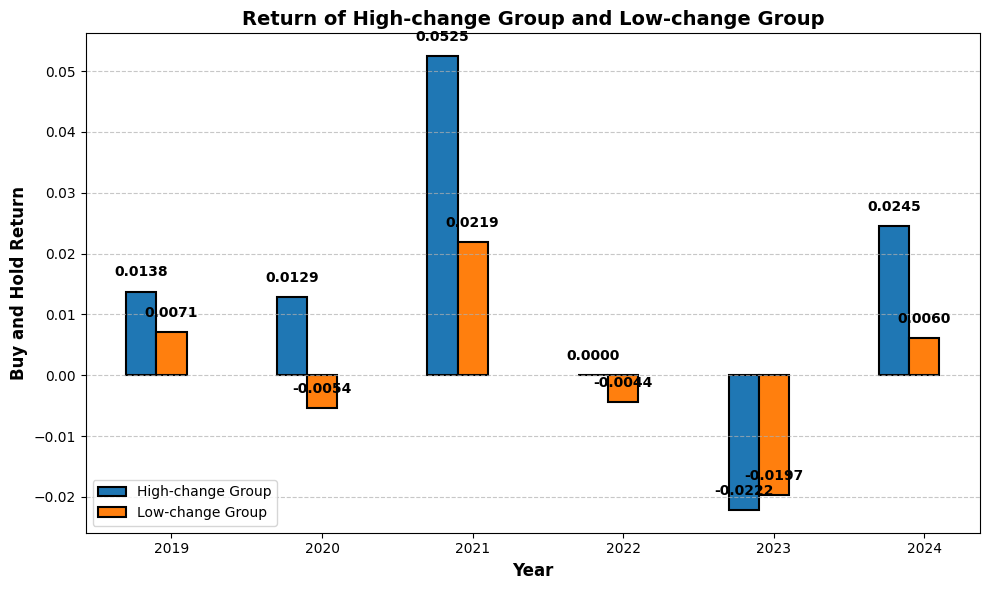

In [20]:
# change to dataframe
returns_df = pd.DataFrame(returns)
print(returns_df)

# Set the position of the bars on the x-axis
x = np.arange(len(returns_df['year']))  # Positions of the years on the x-axis
width = 0.2  # Width of each bar

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot different data columns with custom colors and edges
bars1 = ax.bar(x - width, returns_df['high_avg_return'], width, label='High-change Group', color='#1f77b4', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x, returns_df['low_avg_return'], width, label='Low-change Group', color='#ff7f0e', edgecolor='black', linewidth=1.5)

# Add data labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.002, f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(bars1)
add_labels(bars2)
#add_labels(bars3)

# Add labels and title with improved font styling
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Buy and Hold Return', fontsize=12, fontweight='bold')
ax.set_title('Return of High-change Group and Low-change Group', fontsize=14, fontweight='bold')

# Improve the x-ticks
ax.set_xticks(x)
ax.set_xticklabels(returns_df['year'], fontsize=10, fontweight='light')

# Add gridlines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add the legend with a more appealing position
ax.legend(loc='lower left', fontsize=10)

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()